# Reconhecimento de Movimentos Utilizando uma Rede Feedforward (FNN)

In [1]:
import pandas as pd

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", sep="\s+", header=None)

labels

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


## Preparação dos *Datasets*

In [2]:
# Carregar os datasets
X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)

X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None)
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])]
X_val = X_test_val[round(0.9*X_test_val.shape[0]):]
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])]
y_val = y_test_val[round(0.9*y_test_val.shape[0]):]

X_train.shape, y_train.shape

((7352, 561), (7352, 1))

## Criar o Modelo

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras

# Criação do objeto do Modelo
modelo = Sequential()
modelo.add(Dense(576, activation="relu"))
modelo.add(Dense(9, activation="relu"))
modelo.add(Dense(7, activation="softmax"))

modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

y_treino_cat = to_categorical(y_train)
y_teste_cat = to_categorical(y_test)
y_val_cat = to_categorical(y_val)

historico = modelo.fit(X_train, y_treino_cat, epochs=20, batch_size=10, validation_data=(X_val, y_val_cat))
modelo.save("ModeloFNN.keras")

Epoch 1/20
736/736 [==============================] - 3s 3ms/step - loss: 0.1218 - accuracy: 0.8260 - precision: 0.8651 - recall: 0.8074 - val_loss: 0.0276 - val_accuracy: 0.9932 - val_precision: 0.9932 - val_recall: 0.9932
Epoch 2/20
736/736 [==============================] - 2s 2ms/step - loss: 0.0438 - accuracy: 0.9471 - precision: 0.9477 - recall: 0.9468 - val_loss: 0.0156 - val_accuracy: 0.9966 - val_precision: 0.9966 - val_recall: 0.9966
Epoch 3/20
736/736 [==============================] - 2s 2ms/step - loss: 0.0336 - accuracy: 0.9563 - precision: 0.9566 - recall: 0.9563 - val_loss: 0.0092 - val_accuracy: 0.9932 - val_precision: 0.9932 - val_recall: 0.9932
Epoch 4/20
736/736 [==============================] - 2s 2ms/step - loss: 0.0245 - accuracy: 0.9695 - precision: 0.9695 - recall: 0.9695 - val_loss: 0.0361 - val_accuracy: 0.9288 - val_precision: 0.9288 - val_recall: 0.9288
Epoch 5/20
736/736 [==============================] - 2s 2ms/step - loss: 0.0248 - accuracy: 0.9676 - pr

## Avaliação da Precisão do Modelo

In [4]:
_, precisao, precision, recall  = modelo.evaluate(X_test, y_teste_cat)
f1_score = (2 * precision * recall) / (precision + recall)
print(f"Precisão do Modelo: {precisao*100} %")
print(f"Precision do Modelo: {precision*100} %")
print(f"Recall do Modelo: {recall*100} %")
print(f"F1-Score do Modelo: {f1_score*100} %")

83/83 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9423 - precision: 0.9423 - recall: 0.9423
Precisão do Modelo: 94.2307710647583 %
Precision do Modelo: 94.2307710647583 %
Recall do Modelo: 94.2307710647583 %
F1-Score do Modelo: 94.2307710647583 %


## Evolução da Precisão ao Longo do Treino

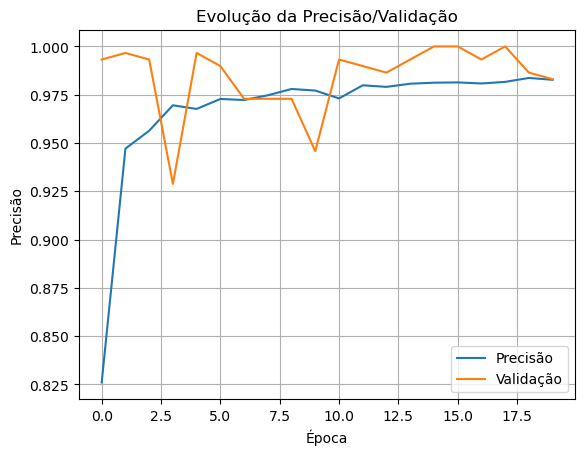

In [5]:
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Evolução da Precisão/Validação")
plt.ylabel("Precisão")
plt.xlabel("Época")
plt.legend(["Precisão", "Validação"])
plt.grid()
plt.savefig("Evolução Precisão Validação FNN", bbox_inches="tight")
plt.show()

## Matriz de Confusão

83/83 [==============================] - 0s 1ms/step


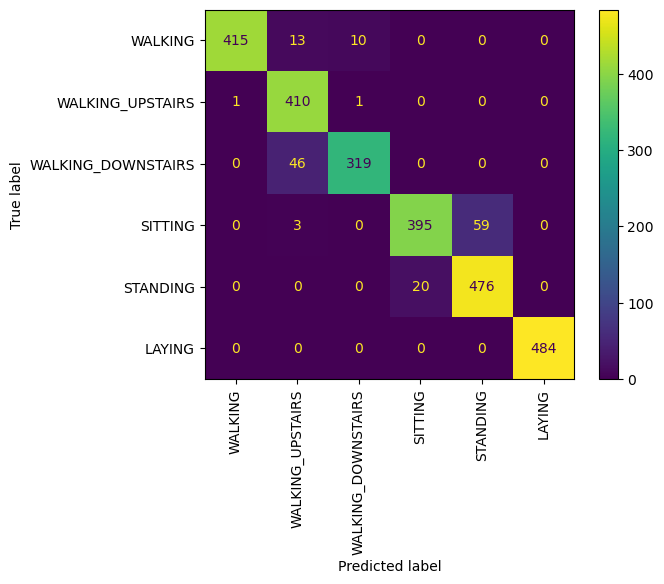

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Saídas previstas
y_previsto = modelo.predict(X_test)
y_previsto = [np.argmax(y) for y in y_previsto]

# Saídas Reais
y_real = [np.argmax(y) for y in y_teste_cat]

# Criação da matriz de confusão
cm = confusion_matrix(y_real, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])

# Mostrar a matriz de confusão
display.plot(xticks_rotation="vertical")
display.figure_.savefig("Matriz de Confusão FNN", bbox_inches="tight")